<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp24-notes/blob/main/Day19_Building_Modular_MLP_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day19
## Building Modular MLP using PyTorch

#### CS167: Machine Learning, Spring 2024

Thursday, April 11th, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_syllabus_sp24.pdf)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## __Put the Model on Training Device (GPU or CPU)__
We want to accelerate the training process using graphical processing unit (GPU). Fortunately, in Colab we can access for GPU. You need to enable it from _Runtime-->Change runtime type-->GPU or TPU_

In [1]:
# check to see if torch.cuda is available, otherwise it will use CPU
import torch
import torch.nn as nn
import numpy as np
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")


Using cuda device


#__Building Modular Code for Multilayer Perceptron (MLP)__

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp24/notes/images/mlp_network1.png" width=800/>
</div>

A multilayer perceptron is the simplest type of neural network. It consists of perceptrons (aka nodes, neurons) arranged in layers.
Create a network class with two methods:
- _init()_
- _forward()_


In [ ]:
import torch
from torch import nn

# You can give any name to your new network, e.g., SimpleMLP.
# However, you have to mandatorily inherit from nn.Module to
# create your own network class. That way, you can access a lot of
# useful methods and attributes from the parent class nn.Module

class SimpleMLP(nn.Module):
  def __init__(self):
    super().__init__()
    # your network layer construction should take place here
    # ...
    # ...

  def forward(self, x):
    # your code for MLP forward pass should take place here
    # ...
    # ...
    return x

Let's create the MLP as shown in the picture above using this template. In general, we will follow this template for constructing other neural networks such as CNN, RNN, and Transformer in PyTorch. Hence, it is a very generic setup. Here are the useful PyTorch modules we will be using for MLP construction:
- [nn.Linear()](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
  - creates the dense connections (corresponding to the weigts of edges) between two adjacent layers (_left layer_ and _right layer_)
  - just provide __#neurons_left_layer__ and __#neurons_right_layer__
- [nn.Sigmoid()](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#sigmoid)
- [nn.ReLU()](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#relu)
- [nn.Softmax()](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#softmax)

In [ ]:
import torch
from torch import nn
import pdb

class SimpleMLPv1(nn.Module):
  def __init__(self):
    super().__init__()
    # your network layer construction should take place here

    num_of_neurons_input_layer      = 784
    num_of_neurons_1st_hidden_layer = 256
    num_of_neurons_output_layer     = 10 # usually this number should be equal to the total number of classes in your classification task

    self.first_hidden_layer         = nn.Linear(num_of_neurons_input_layer, num_of_neurons_1st_hidden_layer)  # linear transformation module (input=784, output=256)
    self.relu_activation_h1         = nn.ReLU()
    self.output_layer               = nn.Linear(num_of_neurons_1st_hidden_layer, num_of_neurons_output_layer) # linear transformation module (input=256, output=10)


  def forward(self, x):
    # your code for MLP forward pass should take place here
    output = self.first_hidden_layer(x)
    output = self.relu_activation_h1(output)
    print('1st-hidden layer feature map shape: ', output.shape)
    output = self.output_layer(output)
    print('Output layer feature map shape: ', output.shape)
    #output = self.softmax_activation(output)

    return output


In [13]:
import torch
from torch import nn
import pdb

class SimpleMLPv2(nn.Module):
  def __init__(self):
    super().__init__()
    # your network layer construction should take place here

    num_of_neurons_input_layer      = 784
    num_of_neurons_1st_hidden_layer = 512
    num_of_neurons_2nd_hidden_layer = 256
    num_of_neurons_output_layer     = 10 # usually this number should be equal to the total number of classes in your classification task

    self.first_hidden_layer         = nn.Linear(num_of_neurons_input_layer, num_of_neurons_1st_hidden_layer)  # linear transformation module (input=784, output=512)
    self.relu_activation_h1         = nn.ReLU()
    self.second_hidden_layer        = nn.Linear(num_of_neurons_1st_hidden_layer, num_of_neurons_2nd_hidden_layer)  # linear transformation module (input=512, output=256)
    self.relu_activation_h2         = nn.ReLU()
    self.output_layer               = nn.Linear(num_of_neurons_2nd_hidden_layer, num_of_neurons_output_layer) # linear transformation module (input=256, output=10)


  def forward(self, x):
    # your code for MLP forward pass should take place here
    output = self.first_hidden_layer(x)
    output = self.relu_activation_h1(output)
    print('1nd-hidden layer feature map shape: ', output.shape)
    output = self.second_hidden_layer(output)
    output = self.relu_activation_h2(output)
    print('2nd-hidden layer feature map shape: ', output.shape)
    output = self.output_layer(output)
    print('Output layer feature map shape: ', output.shape)
    #output = self.softmax_activation(output)

    return output


In [14]:
# check the structure of your MLP
mlp_model = SimpleMLPv2()
print(mlp_model)

SimpleMLPv2(
  (first_hidden_layer): Linear(in_features=784, out_features=512, bias=True)
  (relu_activation_h1): ReLU()
  (second_hidden_layer): Linear(in_features=512, out_features=256, bias=True)
  (relu_activation_h2): ReLU()
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
)


In [15]:
# check the sizes of weights and biases of your MLP's 1st hidden layers
print('size of weights of first_hidden_layer: \n ', mlp_model.first_hidden_layer.weight.shape)
print('size of bias of first_hidden_layer: \n ', mlp_model.first_hidden_layer.bias.shape)

size of weights of first_hidden_layer: 
  torch.Size([512, 784])
size of bias of first_hidden_layer: 
  torch.Size([512])


In [ ]:
# check the randomly initialized values of weights and biases of your MLP's 1st hidden layers
print('weights of first_hidden_layer: \n ', mlp_model.first_hidden_layer.weight)
print('bias of first_hidden_layer: \n ', mlp_model.first_hidden_layer.bias)

In [17]:
# check the sizes of weights and biases of your MLP's 2nd hidden layer
print('size of weights of second_hidden_layer: \n ', mlp_model.second_hidden_layer.weight.shape)
print('size of bias of second_hidden_layer: \n ', mlp_model.second_hidden_layer.bias.shape)

size of weights of second_hidden_layer: 
  torch.Size([256, 512])
size of bias of second_hidden_layer: 
  torch.Size([256])


In [39]:
print(f"{mlp_model}")

SimpleMLPv2(
  (first_hidden_layer): Linear(in_features=784, out_features=512, bias=True)
  (relu_activation_h1): ReLU()
  (second_hidden_layer): Linear(in_features=512, out_features=256, bias=True)
  (relu_activation_h2): ReLU()
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
)


#__Load the Dataset for your MLP__

We can easily import some [built-in datasets](https://pytorch.org/vision/stable/datasets.html) from PyTorch's [torchvision.datasets](torchvision.datasets) module
- [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)
  - each image size: 28x28 grayscale image
  - each image is associated with a label from __10 classes__
  - training set of 60,000 examples and a test set of 10,000 examples

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp24/notes/images/fashion-mnist-sprite.png" width=500/>
</div>


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets # torchvision has many deep learning benchmark datasets Fashion-MNIST, CIFAR-10, Caltech-50, etc
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="/content/drive/MyDrive/cs167_sp24/datasets",
    train=True,
    download=True,
    transform=ToTensor() # specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="/content/drive/MyDrive/cs167_sp24/datasets",
    train=False,
    download=True,
    transform=ToTensor()
)


__Explore some sample training images__

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
#image, label = training_data[10000]
#image, label = training_data[20000]
image, label = training_data[50000] # training samples are saved in pairs/tuples of (image, label)
print('sample image size: ', image.shape)
print('label of the sample image: ', labels_map[label])

sample image size:  torch.Size([1, 28, 28])
label of the sample image:  Ankle Boot


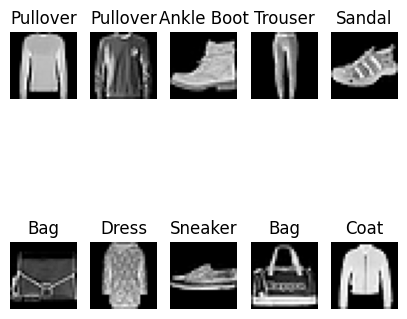

In [8]:
# Visualize a random set of images and their the labels from the training split
# The following labels represent 10 classes, each with specific indices as defined by the creator of the Fashion-MNIST dataset
# reference: https://github.com/zalandoresearch/fashion-mnist#labels
torch.manual_seed(1)
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(5, 5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    #print('image tensor size:', img.shape)
    plt.imshow(img.squeeze(), cmap="gray") # .squeeze() method removes the '1' from first dimension of the tensor [1, 28, 28]
    #print('after removing the first dimension with ', img.squeeze().shape)
plt.show()

##__Prepare Your Data with DataLoader for Training/Testing__
We just explored one sample of data at a time. As we have seen in our discussion of the optimizer, specifically __Stochastic Gradient Descent (SGD)__, during training your network, we may need to pass them in __minibatches__. PyTorch has a module called __DataLoader__, which will do this automatically for us as long as we provide the right arguments:
- prepare the __minibatches__ with the given _batch_size_ eg 16, 32, 64, 128, etc
- multiprocessing to speed up the data retrieval
- reshuffle the data at every __epoch__


In [9]:
from torch.utils.data import DataLoader
#                              pairs of items,   minibatch size,      random shuffling turned ON
train_dataloader = DataLoader(training_data,     batch_size=128,        shuffle=True)
test_dataloader  = DataLoader(test_data,         batch_size=128,        shuffle=False) # for testing/inference: it is not necessary to shuffle


Images batch shape: torch.Size([128, 1, 28, 28])
Labels batch shape: torch.Size([128])


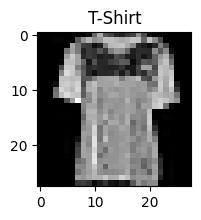

Label: 0


In [12]:
# explore the data from the train_dataloader
train_inputs, train_labels = next(iter(train_dataloader)) # returns a batch of 128 train-images and train-labels
print(f"Images batch shape: {train_inputs.shape}")
print(f"Labels batch shape: {train_labels.shape}")

# visualize one of the samples in this batch of 128
figure = plt.figure(figsize=(2, 2))
img = train_inputs[127].squeeze() # I picked 127 but you can pick any index in between 0 to batch_size=128
label = train_labels[127]         # It's a tensor datatype
plt.title(labels_map[int(label)]) # For indexing, convert the 'tensor' datatype --> integer number datatype
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#__Forward Pass using your Dataset and your MLP__
Test a forward pass of our MLP using one of the training samples. You need to convert a matrix of numbers into a contiguous vector using the following PyTorch module:
- [nn.flatten()](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)

The forward method inside our network class, __SimpleMLPv2__, will be invoked if we provide an input tensor __'X'__ to the network object we instantiated earlier, i.e., __mlp_model__, as follows:
- _output = mlp_model(X)_

Finally, we convert the ouput from the model into probabilities using __Softmax()__ module:
- _pred_probab = softmax_activation(output)_



In [41]:
img   = train_inputs[100] # I picked the sample at the 100-th but you can pick any index in between 0 to batch_size=128
label = train_labels[100]

softmax_activation = nn.Softmax(dim=0)

X           = img.flatten()
print('shape of X: ', X.shape)

# data and model should be placed to the same device (GPU or CPU)
X           = X.to(device)                # sending the data tensor to GPU (if available)
mlp_model.to(device)                      # sending the model to GPU (if available) print(f"device {device} and model: \n {mlp_model}")
output      = mlp_model(X)                # last layer of our network will return 10 values each will range in between in [-infty, infty]
pred_probab = softmax_activation(output)  # these raw numbers scaled to values [0, 1] representing the model’s predicted probabilities for each class


print('predited probability \n', pred_probab)
y_pred      = pred_probab.argmax()
print(f"Predicted class: {y_pred}")


shape of X:  torch.Size([784])
1nd-hidden layer feature map shape:  torch.Size([512])
2nd-hidden layer feature map shape:  torch.Size([256])
Output layer feature map shape:  torch.Size([10])
predited probability 
 tensor([0.0889, 0.0932, 0.0941, 0.1064, 0.1017, 0.0904, 0.0991, 0.1154, 0.1038,
        0.1069], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: 7


In [42]:
# model parameter counts to find out how many parameter this model will learn from the data
for name, param in mlp_model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} \n")


Layer: first_hidden_layer.weight | Size: torch.Size([512, 784]) 

Layer: first_hidden_layer.bias | Size: torch.Size([512]) 

Layer: second_hidden_layer.weight | Size: torch.Size([256, 512]) 

Layer: second_hidden_layer.bias | Size: torch.Size([256]) 

Layer: output_layer.weight | Size: torch.Size([10, 256]) 

Layer: output_layer.bias | Size: torch.Size([10]) 



##__Defining Loss function__

- [nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
  - useful when training a __classification problem__ with __C__ classes.
  - criterion computes the cross entropy loss between input logits and target
- [nn.MSELoss()](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
  - useful when training a __regression problem__
  - criterion that measures the mean squared error (squared L2 norm) between each element in the input _x_ and target _y_


In [43]:
# initialize the loss function
loss_fn = nn.CrossEntropyLoss() # this is useful for multiclass classification task

##__Initializing the Optimizer__

Optimiztaion, as we have discussed earlier, is process of adjusting model parameters to reduce model error in each training step. PyTorch provides a selection of optimization algorithms in the [torch.optim](https://pytorch.org/docs/stable/optim.html) package. Some of them are as follows:
- [torch.optim.SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)
- [torch.optim..Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)
- [torch.optim.RMSprop](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html#torch.optim.RMSprop)

In addition to selecting the optimizer, we can also select the hyperparameters which are refered to as adjustable parameters crucial for controlling the model optimization process. You can influence the training and convergence of the model by tweaking these hyperparameters:
- __epochs:__ denotes the number of iterations over the dataset
- __batch size:__ represents the quantity of data samples in each iteration propagated through the network before updating the parameters
- __learning rate:__ determines the extent of parameter updates made at each batch/epoch



In [ ]:
learning_rate = 1e-3
batch_size    = 128
epochs        = 10
# let's use SGD optimization algorithm for training our model
optimizer     = torch.optim.SGD(mlp_model.parameters(), lr=learning_rate)

__Let's Simplify Our Networks with PyTorch's Sequential() Module__

In [44]:
import torch
from torch import nn
import pdb

class SimpleMLPv1(nn.Module):
  def __init__(self):
    super().__init__()
    # your network layer construction should take place here

    num_of_neurons_input_layer      = 784
    num_of_neurons_1st_hidden_layer = 256
    num_of_neurons_output_layer     = 10 # usually this number should be equal to the total number of classes in your classification task

    self.flatten = nn.Flatten()
    self.linear_layers = nn.Sequential(
            nn.Linear(num_of_neurons_input_layer, num_of_neurons_1st_hidden_layer),  # linear transformation module (input=784, output=256)
            nn.ReLU(),
            nn.Linear(num_of_neurons_1st_hidden_layer, num_of_neurons_1st_hidden_layer),  # linear transformation module (input=512, output=256)
            nn.ReLU(),
            nn.Linear(num_of_neurons_1st_hidden_layer, num_of_neurons_output_layer) # linear transformation module (input=256, output=10)
        )

  def forward(self, x):
    # your code for MLP forward pass should take place here
    output = self.flatten(x)
    output = self.linear_layers(output)
    return output

mlp_modelv1 = SimpleMLPv1()

In [45]:
class SimpleMLPv2(nn.Module):
  def __init__(self):
    super().__init__()
    # your network layer construction should take place here

    num_of_neurons_input_layer      = 784
    num_of_neurons_1st_hidden_layer = 512
    num_of_neurons_2nd_hidden_layer = 256
    num_of_neurons_output_layer     = 10 # usually this number should be equal to the total number of classes in your classification task

    self.flatten = nn.Flatten()
    self.linear_layers = nn.Sequential(
            nn.Linear(num_of_neurons_input_layer, num_of_neurons_1st_hidden_layer),       # linear transformation module (input=28*28, output=512)
            nn.ReLU(),
            nn.Linear(num_of_neurons_1st_hidden_layer, num_of_neurons_2nd_hidden_layer),  # linear transformation module (input=512, output=256)
            nn.ReLU(),
            nn.Linear(num_of_neurons_2nd_hidden_layer, num_of_neurons_output_layer)       # linear transformation module (input=256, output=10)
        )

  def forward(self, x):
    # your code for MLP forward pass should take place here
    output = self.flatten(x)
    output = self.linear_layers(output)
    return output

mlp_modelv2 = SimpleMLPv2()

#__Putting Everything Together MLP__

__Putting Everything Together using our SimpleMLPv2 Network on Fashion-MNIST Dataset__


In [51]:
# Step 1: load the Torch library and other utilities
#----------------------------------------------------

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import time

# Step 2: load the dataset, ie, we are experimenting with Fashion-MNIST
#--------------------------------------------------------------------------------------------------

training_data = datasets.FashionMNIST(
    root="/content/drive/MyDrive/cs167_sp24/datasets",
    train=True,
    download=True,
    transform=ToTensor() # specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="/content/drive/MyDrive/cs167_sp24/datasets",
    train=False,
    download=True,
    transform=ToTensor()
)

# Step 3: Create your MLP Network (call it SimpleMLPv3) with 3 hidden layers
#--------------------------------------------------------------------------------------------------

class SimpleMLPv2(nn.Module):
  def __init__(self):
    super().__init__()
    # your network layer construction should take place here

    num_of_neurons_input_layer      = 784
    num_of_neurons_1st_hidden_layer = 512
    num_of_neurons_2nd_hidden_layer = 256
    num_of_neurons_output_layer     = 10 # usually this number should be equal to the total number of classes in your classification task

    self.flatten = nn.Flatten()
    self.linear_layers = nn.Sequential(
            nn.Linear(num_of_neurons_input_layer, num_of_neurons_1st_hidden_layer),       # linear transformation module (input=28*28, output=512)
            nn.ReLU(),
            nn.Linear(num_of_neurons_1st_hidden_layer, num_of_neurons_2nd_hidden_layer),  # linear transformation module (input=512, output=256)
            nn.ReLU(),
            nn.Linear(num_of_neurons_2nd_hidden_layer, num_of_neurons_output_layer)       # linear transformation module (input=256, output=10)
        )

  def forward(self, x):
    # your code for MLP forward pass should take place here
    output = self.flatten(x)
    output = self.linear_layers(output)
    return output


# Step 4: Your training and testing functions (you can copy it from the previous demo)
#--------------------------------------------------------------------------------------


def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)

    model.train()                   # set the model to training mode for best practices

    train_loss = 0

    for batch, (X, y) in enumerate(dataloader):

        # compute prediction and loss
        X = X.to(device)                  # send data to the GPU device (if available)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return train_loss/len(dataloader)

def test_loop(dataloader, model, loss_fn):

    model.eval()                    # set the model to evaluation mode for best practices

    size        = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:

            X = X.to(device)                     # send data to the GPU device (if available)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

# Step 5: prepare the DataLoader and select your optimizer and set the hyper-parameters for learning the model from DataLoader
#------------------------------------------------------------------------------------------------------------------------------

mlp_modelv2 = SimpleMLPv2()
mlp_modelv2.to(device)
learning_rate = 1e-3
batch_size_val = 64
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp_modelv2.parameters(), lr=learning_rate)

train_dataloader = DataLoader(training_data, batch_size=batch_size_val)
test_dataloader = DataLoader(test_data, batch_size=batch_size_val)


train_losses = []
test_losses  = []
start_time   = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    avg_train_loss = train_loop(train_dataloader, mlp_modelv2, loss_fn, optimizer)
    avg_test_loss  = test_loop(test_dataloader, mlp_modelv2, loss_fn)
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)

print("Total fine-tuning time: %.3f sec" %( (time.time()-start_time)) )
print("Total fine-tuning time: %.3f hrs" %( (time.time()-start_time)/3600) )

print("SimpleMLPv2 model has been trained!")


Epoch 1
-------------------------------
loss: 2.317959  [   64/60000]
loss: 2.287868  [ 6464/60000]
loss: 2.270595  [12864/60000]
loss: 2.257179  [19264/60000]
loss: 2.232983  [25664/60000]
loss: 2.226871  [32064/60000]
loss: 2.221505  [38464/60000]
loss: 2.202882  [44864/60000]
loss: 2.198575  [51264/60000]
loss: 2.154838  [57664/60000]
Test Error: 
 Accuracy: 44.3%, Avg loss: 2.154101 

Epoch 2
-------------------------------
loss: 2.178008  [   64/60000]
loss: 2.156311  [ 6464/60000]
loss: 2.102654  [12864/60000]
loss: 2.107691  [19264/60000]
loss: 2.043958  [25664/60000]
loss: 2.010467  [32064/60000]
loss: 2.017137  [38464/60000]
loss: 1.954492  [44864/60000]
loss: 1.963863  [51264/60000]
loss: 1.876715  [57664/60000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 1.884322 

Epoch 3
-------------------------------
loss: 1.929843  [   64/60000]
loss: 1.893260  [ 6464/60000]
loss: 1.786422  [12864/60000]
loss: 1.814702  [19264/60000]
loss: 1.687591  [25664/60000]
loss: 1.665298  [32064/600

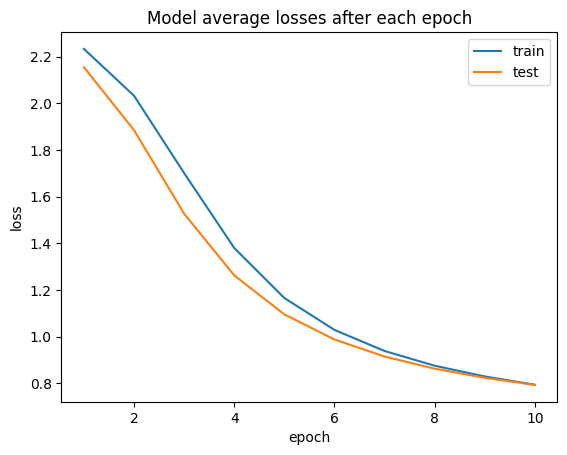

In [52]:
# visualizing the loss curves
plt.plot(range(1,epochs+1), train_losses)
plt.plot(range(1,epochs+1), test_losses)
plt.title('Model average losses after each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [50]:
print(train_losses)
print(test_losses)


[2.249869819897324, 2.078473625152604, 1.7703681225969847, 1.4417538604756663, 1.210175551394664, 1.0609987050866776, 0.9620296563039711, 0.8926493811454854, 0.8414020740401262, 0.8019417113840961]
[2.18355271618837, 1.9481458777834655, 1.5957716900831576, 1.3146629082928798, 1.1321676851837499, 1.0142072397432509, 0.934068221954783, 0.8764376890887121, 0.8329892473615659, 0.7989250038080155]


#__Group Exercise__:
Create another MLP with 3 hidden layers and then train that model on the Fashion-MNIST dataset using the SGD optimizer with a batch size of 64. If time permits, you can also train another MLP with the ADAM optimizer and observe if there is any change in training.

In [ ]:
# Step 1: load the Torch library and other utilities
#----------------------------------------------------


In [ ]:
# Step 2: load the dataset, ie, we are experimenting with Fashion-MNIST
#--------------------------------------------------------------------------------------------------


In [ ]:
# Step 3: Create your MLP Network (call it SimpleMLPv3) with 3 hidden layers
#--------------------------------------------------------------------------------------------------
# You should have the following structure in your MLP
#   num_of_neurons_input_layer      = 784
#   num_of_neurons_1st_hidden_layer = 512
#   num_of_neurons_2nd_hidden_layer = 256
#   num_of_neurons_3rd_hidden_layer = 128
#   num_of_neurons_output_layer     = 10
# You should use ReLU activation function in each hidden layer

In [ ]:
# Step 4: Your training and testing functions (I copied it previous the previous demo. You don't need to change anything)
#--------------------------------------------------------------------------------------

def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)

    model.train()                   # set the model to training mode for best practices

    train_loss = 0

    for batch, (X, y) in enumerate(dataloader):

        # compute prediction and loss
        X = X.to(device)                  # send data to the GPU device (if available)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return train_loss/len(dataloader)

def test_loop(dataloader, model, loss_fn):

    model.eval()                    # set the model to evaluation mode for best practices

    size        = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:

            X = X.to(device)                     # send data to the GPU device (if available)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss


In [ ]:
# Step 5: prepare the DataLoader and select your optimizer and set the hyper-parameters for learning the model from DataLoader
#------------------------------------------------------------------------------------------------------------------------------
# Initialize your hyper-parameter and optimizer with appropriate values
# Use your dataset to prepare your DataLoaders one for training_data and one for test_data
# ...
# ...

print("SimpleMLPv3 model has been trained!")


In [ ]:
# visualizing the loss curves
